In [30]:
def set_dictionaries():
    '''
    This function is used to create the needed dictionaries for the function food_web_plot.

    Inputs: None

    Outputs: direction_dict (dictionary type object), position_dict (dictionary type object), edges_dict (dictionary type object)
    
    direction_dict is a dictionary of node connections using labels used to initialize the networkx graph.
    postiion_dict is a dictionary of node positions indexed by animal names as strings.
    edges_dict is a dictionary indexed by tuples (first_node, second_node). Each key stores the info "Missing Val!" to
        help indicate whether these values were updated later.
    '''
    #Creates a matrix to use for the directions of edges in the Networkx Plot.
    direction_dict = {"Arctic Cod": ["Orca", "Leopard Seal"], 
                    "Orca": [], 
                    "Krill": ["Arctic Cod", "Orca", "Leopard Seal", "Balleen Whale", "Penguin"], 
                    "Penguin": ["Orca"], 
                    "Balleen Whale": [], 
                    "Leopard Seal": ["Orca"]}
    
    #Creates a matrix to use for the locations of nodes in the Networkx Plot.
    position_dict = {"Arctic Cod": (1, 5), 
                    "Orca": (7, 4), 
                    "Krill": (3.5, 5.5), 
                    "Penguin": (5.75, 6.5), 
                    "Balleen Whale": (2, 8), 
                    "Leopard Seal": (6.5, 8)}

    #Creates a matrix to use for edge labels (Place Holder Code)
    edges_dict = {} #Place Holder Code
    for i in direction_dict:
        for j in direction_dict[i]:
            edges_dict[(i, j)] = 'Missing Val!' #Place Holder Code

    #Returns the above dictionaries
    return direction_dict, position_dict, edges_dict




def food_web_plot(direction_dict, position_dict, edges_dict, node_size_array = [3000, 3000, 3000, 3000, 3000, 3000]):
    '''
    This function creates a Networkx graph.

    Inputs: direction_dict (dictionary type object), position_dict (dictionary type object), edges_dict (dictionary type object)
    This inputs are obtained from the set_dictionaries function, edges_dict is designed to be updated before use.
    
    Optional Input of node_size_array (array type object with length == len(direction_dict). Changing this array is not recommended.

    Output: A visual of the input data graphed using Networkx. This function does not return anything, it only prints an image.
    '''
    #Plots the Networkx Graph
    G = nx.DiGraph(direction_dict)
    plt.figure(3,figsize=(12,7)) #Sets the figuresize
    nx.draw_networkx_edge_labels(G, pos = position_dict, edge_labels = edges_dict, verticalalignment = "bottom") #Plots edge labels
    nx.draw_networkx(G, pos = position_dict, node_size = node_size_array, node_color = "w") #Plots the nodes in white with locations

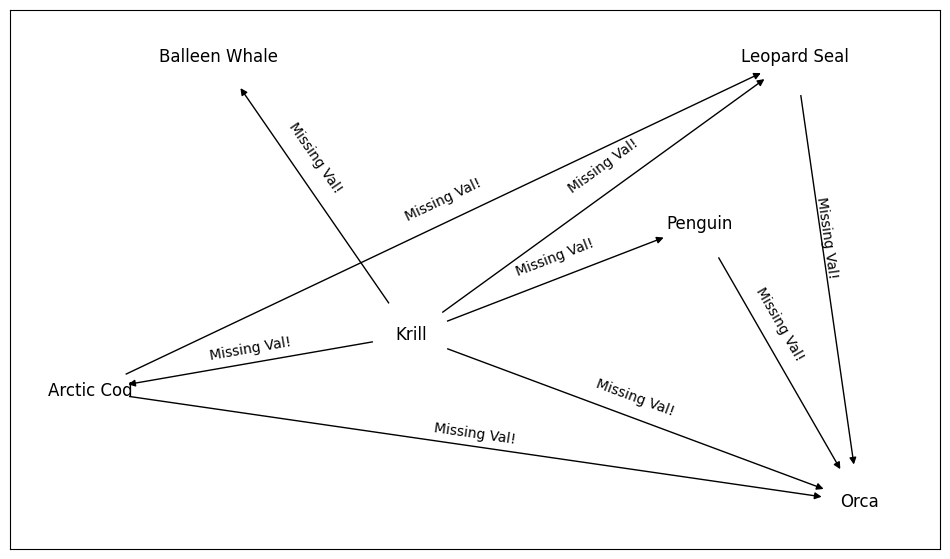

In [31]:
#Importing needed libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
    

direction_dict, position_dict, edges_dict = set_dictionaries()
food_web_plot(direction_dict, position_dict, edges_dict)